### Квартиры

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'drive/MyDrive/DS/house/'

In [7]:
df = pd.read_csv(path+'real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [9]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [14]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [19]:
df[(df['ceiling_height'] < 4) & (df['ceiling_height'] > 2.3)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,NaN,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [21]:
df = df[(df['ceiling_height'] < 4) & (df['ceiling_height'] > 2.3)]

In [32]:
mean_ceil_h = df.groupby('locality_name').mean()['ceiling_height']

In [30]:
cities_list = df.groupby('locality_name').mean()['ceiling_height'].index

In [49]:
for i, city in enumerate(cities_list):
  df.loc[df['locality_name'] == city]['ceiling_height'].fillna(mean_ceil_h[i], inplace = True)

df  

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,NaN,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [50]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area               787
floor                       0
is_apartment            12540
studio                      0
open_plan                   0
kitchen_area              923
balcony                  7177
locality_name              13
airports_nearest         2929
cityCenters_nearest      2912
parks_around3000         2911
parks_nearest            9143
ponds_around3000         2911
ponds_nearest            8710
days_exposition          2423
dtype: int64

In [48]:
#for i, city in enumerate(cities_list):
list(enumerate(cities_list))

[(0, 'Бокситогорск'),
 (1, 'Волосово'),
 (2, 'Волхов'),
 (3, 'Всеволожск'),
 (4, 'Выборг'),
 (5, 'Высоцк'),
 (6, 'Гатчина'),
 (7, 'Зеленогорск'),
 (8, 'Ивангород'),
 (9, 'Каменногорск'),
 (10, 'Кингисепп'),
 (11, 'Кириши'),
 (12, 'Кировск'),
 (13, 'Колпино'),
 (14, 'Коммунар'),
 (15, 'Красное Село'),
 (16, 'Кронштадт'),
 (17, 'Кудрово'),
 (18, 'Лодейное Поле'),
 (19, 'Ломоносов'),
 (20, 'Луга'),
 (21, 'Любань'),
 (22, 'Мурино'),
 (23, 'Никольское'),
 (24, 'Новая Ладога'),
 (25, 'Отрадное'),
 (26, 'Павловск'),
 (27, 'Петергоф'),
 (28, 'Пикалёво'),
 (29, 'Подпорожье'),
 (30, 'Приморск'),
 (31, 'Приозерск'),
 (32, 'Пушкин'),
 (33, 'Санкт-Петербург'),
 (34, 'Светогорск'),
 (35, 'Сертолово'),
 (36, 'Сестрорецк'),
 (37, 'Сланцы'),
 (38, 'Сосновый Бор'),
 (39, 'Сясьстрой'),
 (40, 'Тихвин'),
 (41, 'Тосно'),
 (42, 'Шлиссельбург'),
 (43, 'городской поселок Большая Ижора'),
 (44, 'городской поселок Янино-1'),
 (45, 'городской посёлок Будогощь'),
 (46, 'городской посёлок Виллози'),
 (47, 'городско

In [54]:
cols = ['airports_nearest', 'cityCenters_nearest']
for col in cols:
  df[col].fillna(0, inplace = True)
#df[['airports_nearest', 'cityCenters_nearest']].fillna(0, inplace = True) # двойные скобки, т.к. без них это series. если бы была одна колонка, то хватило бы 1 скобок
df.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area               787
floor                       0
is_apartment            12540
studio                      0
open_plan                   0
kitchen_area              923
balcony                  7177
locality_name              13
airports_nearest            0
cityCenters_nearest         0
parks_around3000         2911
parks_nearest            9143
ponds_around3000         2911
ponds_nearest            8710
days_exposition          2423
dtype: int64

### Вопрос: Какое распределение имеет Last_Price?

In [55]:
import matplotlib.pyplot as plt


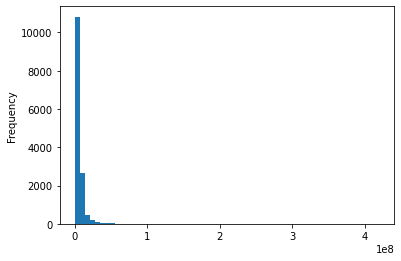

In [62]:
df['last_price'].plot.hist(bins=60)

* Среднее время продажи
* Мода продажи
* Макс/Мин время продажи
* Графики зависимости цен от площади 
* График зав-ти цен от кол-ва комнат
* Зав-ть между удаленности от центра и ценой
* На каких этажах самые дорогие квартиры (Разделить квартиры на 1-ый этаж, послдений этаж (каким бы он ни был) и другие)
* Влияет ли день недели(Время, когда выложено объявление) на цену? (библиотека calendar)
* Влияет ли день недели на скорость продажи?
* В каком году продавались самые дорогие квартиры? (Вывести графики зав-ти года/месяца от цен)
* Вывести топ10 городов по кол-ву объявлений.
* Вывести среднюю цену по топ10 городам (ср. цена для каждого города) Самый дорогой город - там, где средний прайс в топ10. В порядке убывания
* Ср. цена за километр от центра
* Сравнить цены в центре города (2км от центра) с ценами в общем по городу (включая все цены)